## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

In [74]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 44 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 4s (2,938 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122221 files and dire

In [1]:
!pip install requests

In [2]:
!pip install beautifulsoup4

In [3]:
!pip install nltk
!pip install konlpy

In [4]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import re

In [19]:
plt.rc('font', family='NanumBarunGothic')

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [84]:
url = 'https://www.aitimes.com/news/articleView.html?idxno=158026'

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
contents = soup.select('#article-view-content-div > p')
text = ''
for p in contents:
  text += p.text

In [85]:
text

'인공지능(AI) 학습을 위해 인터넷 커뮤니티나 SNS의 게시물을 사용하는 것에 대한 문제가 떠올랐다. 이제까지 관련 기업은 사용약관에 이를 고지하는 정도에 그쳤는데, 미국 정부가 이 문제의 본격 검토에 나섰다.테크 전문 와이어드는 15일(현지시간) 레딧이 미국 연방무역위원회(FTC)로부터 AI 모델을 교육하기 위해 제3자와 사용자 생성 콘텐츠를 판매, 라이센스 또는 공유하는 것에 대한 질문 서한을 받았다고 보도했다. 레딧 말고도 같은 취지의 요청을 받은 회사가 더 있는 것으로도 달려졌다.이에 따르면 미국 정부의 독점 금지 규제 기관인 FTC는 불공정하거나 기만적인 거래 관행에 연루된 것으로 밝혀진 기업을 제재할 권한을 갖고 있다. 이번 조사는 사용자 생성 콘텐츠를 AI 학습에 제공하는 것에 대한 국회의원과 권리 단체 등의 개인 정보 보호 위험 및 공정성, 저작권 등에 대한 의문을 반영한다고 전했다.현재 미국 대부분 매체는 레딧의 기업공개(IPO) 문제에만 초점을 맞추고 있다. 이 회사는 65억달러(약 8조6600억원)의 기업가치로 상장을 앞두고 있다.하지만 와이어드는 170억개의 게시물과 댓글이 사용자들의 별도 동의 과정 없이 AI 학습에 활용되는 것에 대해 근본적인 의문이 생기고 있다고 지적했다. 레딧은 올해 초 구글과 연간 6000만달러(약 800억원) 규모의 대형 저작권 계약을 맺은 것으로 알려졌다.커뮤니티나 SNS는 실시간 뉴스를 반영할 수 있는 가장 좋은 수단이다. 실제로 일론 머스크의 xAI가 내놓은 챗봇 \'그록\'은 X(트위터)를 통해 실시간 이슈에 대한 답을 내놓을 수 있다는 것이 가장 큰 장점으로 꼽힌다.메타 역시 \'메타AI\'에 비슷한 방법을 적용하는 것으로 알려졌다. 대부분 소셜 미디어 회사는 사용 약관에 사용자 데이터를 회사가 사용할 수 있다는 조항을 가지고 있다.하지만 이 문제는 그리 간단하지 않다. SNS 회사들은 사용자들로부터 자신들의 데이터를 활용해 각종 사업을 펼치는 문제와 관련해 다수의 소송을 진행하고 있다.실제로 AI 모

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [37]:
from collections import Counter
from string import punctuation
from konlpy.tag import Okt

In [90]:
for p in punctuation:
  text = text.replace(p,'')
okt=Okt()
words = okt.morphs(text)

In [91]:
words_list = []
counts_list = []
for word in words:
  words_list.append(word)
  counts_list.append(text.count(word))

In [92]:
print('단어 :', words_list)
print('횟수 :', counts_list)

단어 : ['인공', '지능', 'AI', '학습', '을', '위해', '인터넷', '커뮤니티', '나', 'SNS', '의', '게시', '물', '을', '사용', '하는', '것', '에', '대한', '문제', '가', '떠올랐다', '이제', '까지', '관련', '기업', '은', '사용', '약관', '에', '이를', '고지', '하는', '정도', '에', '그쳤는데', '미국', '정부', '가', '이', '문제', '의', '본격', '검토', '에', '나섰다', '테크', '전문', '와이어', '드는', '15일', '현지시간', '레딧', '이', '미국', '연방', '무역', '위원회', 'FTC', '로부터', 'AI', '모델', '을', '교육', '하기', '위해', '제', '3', '자', '와', '사용자', '생', '성', '콘텐츠', '를', '판매', '라이센스', '또는', '공유', '하는', '것', '에', '대한', '질문', '서한', '을', '받았다고', '보도', '했다', '레딧', '말고도', '같은', '취지', '의', '요청', '을', '받은', '회사', '가', '더', '있는', '것', '으로도', '달려졌다이에', '따르면', '미국', '정부', '의', '독점', '금지', '규제', '기관', '인', 'FTC', '는', '불공정', '하', '거나', '기만', '적', '인', '거래', '관행', '에', '연루', '된', '것', '으로', '밝혀진', '기업', '을', '제재', '할', '권한', '을', '갖고', '있다', '이번', '조사', '는', '사용자', '생', '성', '콘텐츠', '를', 'AI', '학습', '에', '제공', '하는', '것', '에', '대한', '국회의원', '과', '권리', '단체', '등', '의', '개인', '정보', '보호', '위험', '및', '공', '정성', '저작권', '등', '에', '

In [93]:
n = len(words_list)
word_col = pd.DataFrame(words_list, np.arange(n))
count_col = pd.DataFrame(counts_list, np.arange(n))

In [94]:
wc_df = pd.concat([word_col,count_col], axis = 1)
wc_df.columns = ['word','count']
wc_df

,word,count
0,인공,1
1,지능,1
2,AI,9
3,학습,5
4,을,25
...,...,...
559,분석,1
560,이다,2
561,박찬,1
562,기자,1


1.3 불용어를 제거하시오.

https://www.ranks.nl/stopwords/korean

In [82]:
def text_cleaning(text):
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
  result = hangul.sub('',text)
  return result

wc_df['word'] = wc_df['word'].apply(lambda x : text_cleaning(x))

In [83]:
wc_df

,word,count
0,인공,1
1,지능,1
2,,9
3,학습,5
4,을,25
...,...,...
559,분석,1
560,이다,2
561,박찬,1
562,기자,1


In [97]:
again = ''.join(wc_df['word'])
tagger = Okt()
word_nouns = tagger.nouns(again)
word_nouns_count = Counter(word_nouns)
word_nouns_count

Counter({'인공': 1,
         '지능': 1,
         '학습': 4,
         '위해': 2,
         '인터넷': 1,
         '커뮤니티': 1,
         '의': 1,
         '게시': 1,
         '대한': 3,
         '문제': 9,
         '이제': 1,
         '관련': 2,
         '기업': 3,
         '사용': 5,
         '약관': 2,
         '정도': 1,
         '미국정부': 2,
         '본격': 1,
         '검토': 1,
         '테크': 1,
         '전문': 1,
         '와이어': 1,
         '로부터': 2,
         '모델': 2,
         '교육': 1,
         '위': 1,
         '해제': 1,
         '자': 1,
         '자생': 2,
         '콘텐츠': 3,
         '판매': 1,
         '라이센스': 1,
         '공유': 1,
         '것': 1,
         '질문서': 1,
         '보도': 1,
         '레딧': 7,
         '취지': 1,
         '요청': 1,
         '회사': 6,
         '독점': 1,
         '금지': 1,
         '규제': 1,
         '기관': 1,
         '불공정': 1,
         '거나': 1,
         '기만': 1,
         '거래': 1,
         '관행': 1,
         '연루': 1,
         '제재': 1,
         '권한': 1,
         '번조': 1,
         '제공': 3,
         '국회의원': 1,


1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [13]:
from wordcloud import WordCloud

In [98]:
wc3 = dict(word_nouns_count.most_common(40))

In [99]:
wc3

{'문제': 9,
 '데이터': 9,
 '레딧': 7,
 '회사': 6,
 '사용': 5,
 '학습': 4,
 '대한': 3,
 '기업': 3,
 '콘텐츠': 3,
 '제공': 3,
 '등': 3,
 '사용자': 3,
 '위해': 2,
 '관련': 2,
 '약관': 2,
 '미국정부': 2,
 '로부터': 2,
 '모델': 2,
 '자생': 2,
 '개인': 2,
 '저작권': 2,
 '의문': 2,
 '반영': 2,
 '대부분': 2,
 '활용': 2,
 '대해': 2,
 '실시간': 2,
 '실제': 2,
 '통해': 2,
 '메타': 2,
 '훈련': 2,
 '가능성': 2,
 '인공': 1,
 '지능': 1,
 '인터넷': 1,
 '커뮤니티': 1,
 '의': 1,
 '게시': 1,
 '이제': 1,
 '정도': 1}

In [100]:
image = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color = 'white', max_font_size = 60)
cloud = image.generate_from_frequencies(wc3)
cloud.to_file('wc.png')

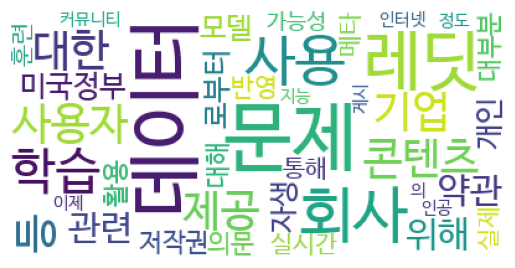

In [101]:
plt.figure()
plt.axis('off')
plt.imshow(cloud)
plt.show()

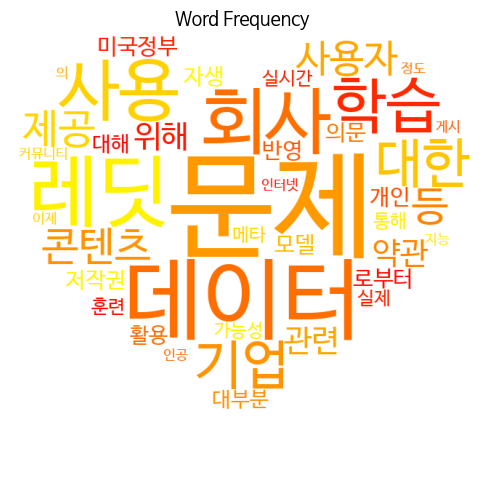

In [105]:
#하트모양
from PIL import Image
import numpy as np

im = Image.open('/content/heart.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color ='white', colormap='autumn',
                      width = 700, height = 700, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(wc3)

plt.figure(figsize = (6, 6))
plt.imshow(wordcloud)
plt.title("Word Frequency", size = 13)

plt.axis('off')

plt.show()

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

In [146]:
# 이 부분은 처음 한번만 실행하면 됌.
# 코드 수정 - "The reason is that the last Ubuntu update update supports chromium driver just via snap."
# 최근 우분투 업데이트에서 크롬 드라이버 설치를 snap을 이용해서만 하도록 바뀜
# 고로 snap 없이 설치하는 아래 우회 코드로 변경
# 출처 : https://colab.research.google.com/drive/1cbEvuZOhkouYLda3RqiwtbM-o9hxGLyC
# 출처2 : https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver


# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.ErCH7Xe2d9/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.HyEibeUREl/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.9OyReHv5qd/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [179]:
import selenium
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [180]:
service = Service('/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--kiosk')
wd = webdriver.Chrome(service = service, options = options)

In [181]:
url = 'https://play.google.com/store/apps/details?id=com.banjihagames.farmstone&hl=ko-KR' #크롤링주소
# 페이지 열기
wd.get(url)
# 페이지 로딩 대기
wait = WebDriverWait(wd, 10)

In [182]:
wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [184]:
wd.find_element(by = By.XPATH, value = '//*[@id="yDmH0d"]/c-wiz[2]/div/div/div[1]/div/div[2]/div/div[1]/div[1]/c-wiz[5]/section/div/div[2]/div[5]/div/div/button/span').click()

ElementClickInterceptedException: Message: element click intercepted: Element <span jsname="V67aGc" class="VfPpkd-vQzf8d">...</span> is not clickable at point (98, 10). Other element would receive the click: <a href="/store/games" aria-label="Google Play 로고" class="f0UV3d">...</a>
  (Session info: headless chrome=90.0.4430.212)
Stacktrace:
#0 0x59b4e83037f9 <unknown>
#1 0x59b4e82a33b3 <unknown>
#2 0x59b4e7feb016 <unknown>
#3 0x59b4e802517c <unknown>
#4 0x59b4e8023654 <unknown>
#5 0x59b4e802176c <unknown>
#6 0x59b4e8020a20 <unknown>
#7 0x59b4e8016fb9 <unknown>
#8 0x59b4e8042dc2 <unknown>
#9 0x59b4e8016d7b <unknown>
#10 0x59b4e8042fce <unknown>
#11 0x59b4e80539e1 <unknown>
#12 0x59b4e8042c93 <unknown>
#13 0x59b4e8014ce4 <unknown>
#14 0x59b4e80164d2 <unknown>
#15 0x59b4e82cf542 <unknown>
#16 0x59b4e82dece7 <unknown>
#17 0x59b4e82de9e4 <unknown>
#18 0x59b4e82e313a <unknown>
#19 0x59b4e82df5b9 <unknown>
#20 0x59b4e82c4e00 <unknown>
#21 0x59b4e82f65d2 <unknown>
#22 0x59b4e82f6778 <unknown>
#23 0x59b4e830ea1f <unknown>
#24 0x7a331283fac3 <unknown>
#25 0x7a33128d1850 <unknown>


In [168]:
reviews = wd.find_elements(by = By.XPATH, value = '//div[@class = "h3YV2d"]')
for review in reviews:
  print(review.text)

1. 늑대인간 시나리오에서 조카가 죽는 기준을 모르겠습니다. 2. 시나리오나 일반 게임에서 카드가 제거될 때 어떤 카드가 제거된건지 제대로 보여주지 않습니다 3. 카드가 제거될 때 화면을 가려 식량의 변화가 안 보입니다. 4. 활 한번 쏘면 덱의 모든 사냥매가 나오는데 한 마리만 나오게 해주세요. 5. 카드의 등급을 알기 쉽게 해주세요. 6.1일차에 튕겨서 다시 접속하면 게임이 시작해도 카드를 주지 않습니다.
본 적없는 구조로 게임을 만들어서 참신했음. 다만 빵을 모으는데 여러 덱을 사용 가능하게 만들어놨으면서 처음 보는 카드 효과에 대한 설명이 많이 부족함. 카드 모으는 거야 뭐...광고보면서 조금씩 모으면 되는데 위에 적은 것처럼 카드 효과 설명이 없어서 이 카드를 모으는게 맞나 싶어서 카드 덱짜기가 그냥 싫어짐. 처음에만 열심히 하다가 카드 모아서 덱짜야하는 시점에 흥미가 팍 식어버림.
카드가 부족하던 뉴비 시절, 불만을 토로하며 열심히(?) 게임하다 보니 어느새 고인물이 되어 랭킹에 이름을 올리게 되었습니다. 진짜 미친 궁극의 덱을 개발했다 생각했는데 카드 수량을 견딜 수 없어 게임이 자꾸 꺼지는 현상, 보유 수량 오류 경고 메시지와 싸우게 되었고요...😂 이젠 업적을 열심히 깨고 있는데 이 마저도 (유물이 필요한 것 빼고) 거의 남지 않았어요. 고인물이 되니 이제는 컨텐츠가 부족해서 아쉬워요🤔 업적을 아예 컨텐츠화 해서 이런 저런 덱/조건으로 깨기 같은 것도 재밌지 않을까 싶어요. 점수만 올리는 랭킹과 또 다른 재미가 또 있더라고요🥰 그리고 굿즈샵에 띠부띠부씰 언제 재입고 되나요?? 너무 귀여워서 사고 싶은데!!! 인 게임에서는 진짜 딱 한 번 스타터팩인가? 산 이후로 과금 없이 플레이 하는 중인데 굿즈 과금하고 싶어요ㅠㅠㅠ 나에게 실물을 달라!


클릭이 안됨,,,,

In [169]:
def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, 999999999999)")
    time.sleep(1)

In [170]:
reviews = wd.find_elements(by = By.XPATH, value = '//div[@class = "h3YV2d"]')
for review in reviews:
  print(review.text)

1. 늑대인간 시나리오에서 조카가 죽는 기준을 모르겠습니다. 2. 시나리오나 일반 게임에서 카드가 제거될 때 어떤 카드가 제거된건지 제대로 보여주지 않습니다 3. 카드가 제거될 때 화면을 가려 식량의 변화가 안 보입니다. 4. 활 한번 쏘면 덱의 모든 사냥매가 나오는데 한 마리만 나오게 해주세요. 5. 카드의 등급을 알기 쉽게 해주세요. 6.1일차에 튕겨서 다시 접속하면 게임이 시작해도 카드를 주지 않습니다.
본 적없는 구조로 게임을 만들어서 참신했음. 다만 빵을 모으는데 여러 덱을 사용 가능하게 만들어놨으면서 처음 보는 카드 효과에 대한 설명이 많이 부족함. 카드 모으는 거야 뭐...광고보면서 조금씩 모으면 되는데 위에 적은 것처럼 카드 효과 설명이 없어서 이 카드를 모으는게 맞나 싶어서 카드 덱짜기가 그냥 싫어짐. 처음에만 열심히 하다가 카드 모아서 덱짜야하는 시점에 흥미가 팍 식어버림.
카드가 부족하던 뉴비 시절, 불만을 토로하며 열심히(?) 게임하다 보니 어느새 고인물이 되어 랭킹에 이름을 올리게 되었습니다. 진짜 미친 궁극의 덱을 개발했다 생각했는데 카드 수량을 견딜 수 없어 게임이 자꾸 꺼지는 현상, 보유 수량 오류 경고 메시지와 싸우게 되었고요...😂 이젠 업적을 열심히 깨고 있는데 이 마저도 (유물이 필요한 것 빼고) 거의 남지 않았어요. 고인물이 되니 이제는 컨텐츠가 부족해서 아쉬워요🤔 업적을 아예 컨텐츠화 해서 이런 저런 덱/조건으로 깨기 같은 것도 재밌지 않을까 싶어요. 점수만 올리는 랭킹과 또 다른 재미가 또 있더라고요🥰 그리고 굿즈샵에 띠부띠부씰 언제 재입고 되나요?? 너무 귀여워서 사고 싶은데!!! 인 게임에서는 진짜 딱 한 번 스타터팩인가? 산 이후로 과금 없이 플레이 하는 중인데 굿즈 과금하고 싶어요ㅠㅠㅠ 나에게 실물을 달라!


2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [111]:
data = pd.DataFrame(data=[], columns=['날짜','리뷰','별점'])
#날짜, 리뷰, 별점 수집
dates = wd.find_elements(by=By.XPATH, value = '//span[@class="bp9Aid"]')
reviews = wd.find_elements(by=By.XPATH, value = '//div[@class="h3YV2d"]')
stargrades = wd.find_elements(by=By.XPATH, value = '//div[@class="iXRFPc"]')


# k개의 리뷰를 수집합니다.
for i in range(len(reviews)):
    tmp = []
    tmp.append(dates[i].text)
    tmp.append(reviews[i].text)
    tmp.append(stargrades[i].get_attribute('aria-label'))

    tmp = pd.DataFrame(data=[tmp], columns = data.columns)
    data = pd.concat([data,tmp])

print('리뷰 수집 완료')


data.reset_index(inplace=True, drop=True)
data

리뷰 수집 완료


,날짜,리뷰,별점
0,2024년 3월 14일,1. 늑대인간 시나리오에서 조카가 죽는 기준을 모르겠습니다. 2. 시나리오나 일반 ...,별표 5개 만점에 3개를 받았습니다.
1,2024년 2월 19일,본 적없는 구조로 게임을 만들어서 참신했음. 다만 빵을 모으는데 여러 덱을 사용 가...,별표 5개 만점에 3개를 받았습니다.
2,2024년 2월 16일,"카드가 부족하던 뉴비 시절, 불만을 토로하며 열심히(?) 게임하다 보니 어느새 고인...",별표 5개 만점에 5개를 받았습니다.


2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

In [50]:
tmp = data.copy()

tmp['별점'] = tmp['별점'].apply(lambda x : x[5:])

m = re.compile('[0-9][\.0-9]*') #정규표현식

tmp['별점'] = tmp['별점'].apply(lambda x : m.findall(x)[0])
tmp['별점']

0    3
1    3
2    5
Name: 별점, dtype: object

In [51]:
#별점 type변환
tmp.별점 = tmp.별점.astype(float)
#별점 나누기
tmp_low=tmp[tmp['별점']<=3]
tmp_high=tmp[tmp['별점']>3]

In [52]:
tmp_high

,날짜,리뷰,별점
2,2024년 2월 16일,"카드가 부족하던 뉴비 시절, 불만을 토로하며 열심히(?) 게임하다 보니 어느새 고인...",5.0


### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.